# Coverage

The `Coverage` represents the areas searched by the `Team` in a survey. Any `Feature` objects located within the `Coverage` *might* be discovered and collected; any `Feature` objects located outside the `Coverage` will definitely *not* be discovered and collected (at least in the current configuration of `prospect`). Like the `Assemblage`, the `Coverage` requires an `Area` object be passed as a parameter of the creation methods.

The shape and location of these areas are governed by the survey strategy adopted in the simulation. For example, the chosen spacing between transects (and the choice of transects themselves) can be represented in the `Coverage` building block.

## Creating a `Coverage`

A single `Coverage` is created from a list of `SurveyUnit` objects. These `SurveyUnit` objects can be created manually, but because these units are typically regularly-shaped, regularly-spaced, and sharing the same `min_time_per_unit` parameter, there are a some convenience methods provided to create them in bulk and add them to the `Coverage`.

### From a list of `SurveyUnit` objects

First, however, let us create some small square `SurveyUnit` objects manually and use them to create a `Coverage`.

In [1]:
from shapely.geometry import Point
import prospect

radius = 10
circ1 = Point(10, 10).buffer(radius)  # create circle
su1 = prospect.SurveyUnit(
        name="surveyunit1",
        coverage_name="demo_coverage",
        shape=circ1,
        surveyunit_type="radial",
        length=None,
        radius=radius,
        min_time_per_unit=prospect.utils.truncnorm(mean=20, sd=8, lower=0, upper=100),
)

circ2 = Point(50, 50).buffer(radius)  # create circle
su2 = prospect.SurveyUnit(
        name="surveyunit2",
        coverage_name="demo_coverage",
        shape=circ2,
        surveyunit_type="radial",
        length=None,
        radius=radius,
        min_time_per_unit=prospect.utils.truncnorm(mean=20, sd=8, lower=0, upper=100),
)

circ3 = Point(90, 90).buffer(radius)  # create circle
su3 = prospect.SurveyUnit(
        name="surveyunit3",
        coverage_name="demo_coverage",
        shape=circ3,
        surveyunit_type="radial",
        length=None,
        radius=radius,
        min_time_per_unit=prospect.utils.truncnorm(mean=20, sd=8, lower=0, upper=100),
)

In [2]:
type(circ1)

shapely.geometry.polygon.Polygon

In [3]:
type(su1)

prospect.surveyunit.SurveyUnit

In [4]:
demo_area = prospect.Area.from_area_value(
    name='demo_area', 
    value=10000
)

In [5]:
coverage_from_list = prospect.Coverage(name="demo_coverage", area=demo_area, surveyunit_list=[su1, su2, su3], orientation=None, spacing=None)

In [6]:
type(coverage_from_list)

prospect.coverage.Coverage

In [7]:
coverage_from_list.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1198ee1d0>,
 'name': 'demo_coverage',
 'area_name': 'demo_area',
 'surveyunit_list': [<prospect.surveyunit.SurveyUnit at 0x1138afd50>,
 'orientation': None,
 'spacing': None,
 'sweep_width': None,
 'radius': None,
 'df':   surveyunit_name  coverage_name  \
 0     surveyunit1  demo_coverage   
 1     surveyunit2  demo_coverage   
 2     surveyunit3  demo_coverage   
 
                                                shape surveyunit_type  \
 0  POLYGON ((20.000 10.000, 19.952 9.020, 19.808 ...          radial   
 1  POLYGON ((60.000 50.000, 59.952 49.020, 59.808...          radial   
 2  POLYGON ((100.000 90.000, 99.952 89.020, 99.80...          radial   
 
    surveyunit_area length  radius  \
 0       313.654849   None      10   
 1       313.654849   None      10   
 2       313.654849   None      10   
 
                                    min_time_per_unit  
 0  <scipy.stats._distn_infrastructure.rv_frozen o...  
 1  <s

In [8]:
coverage_from_list.df

,surveyunit_name,coverage_name,shape,surveyunit_type,surveyunit_area,length,radius,min_time_per_unit
0,surveyunit1,demo_coverage,"POLYGON ((20.000 10.000, 19.952 9.020, 19.808 ...",radial,313.654849,None,10,<scipy.stats._distn_infrastructure.rv_frozen o...
1,surveyunit2,demo_coverage,"POLYGON ((60.000 50.000, 59.952 49.020, 59.808...",radial,313.654849,None,10,<scipy.stats._distn_infrastructure.rv_frozen o...
2,surveyunit3,demo_coverage,"POLYGON ((100.000 90.000, 99.952 89.020, 99.80...",radial,313.654849,None,10,<scipy.stats._distn_infrastructure.rv_frozen o...


In [9]:
type(coverage_from_list.df)

geopandas.geodataframe.GeoDataFrame

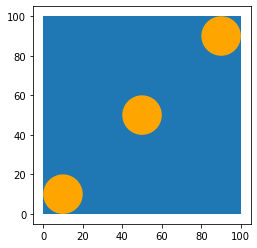

In [10]:
coverage_from_list.df.plot(ax=demo_area.df.plot(), color="orange");

### From a shapefile

The `from_shapefile()` method is useful for reading in existing surveys as `Coverage` objects. These could be the locations of survey units from a completed field survey or maybe survey units that are not shaped according to one of the built-in methods (transects and radial units).

In [11]:
area_from_shp = prospect.Area.from_shapefile(
    name="area_shp", 
    path="./data/demo_area.shp"
)

coverage_from_shp = prospect.Coverage.from_shapefile(
    "./data/demo_coverage.shp",
    name="demo_coverage_from_shp",
    area=area_from_shp,
    surveyunit_type="polygon",
    spacing=None,
    orient_axis=None,
    min_time_per_unit=20
)

In [12]:
coverage_from_shp.df

,surveyunit_name,coverage_name,shape,surveyunit_type,surveyunit_area,length,radius,min_time_per_unit
0,"demo_coverage_from_shp_Index(['index', 'id', '...",demo_coverage_from_shp,"POLYGON ((533601.766 4388853.524, 533595.418 4...",polygon,1295.255792,None,None,20
1,"demo_coverage_from_shp_Index(['index', 'id', '...",demo_coverage_from_shp,"POLYGON ((533675.077 4388864.631, 533708.717 4...",polygon,905.067539,None,None,20
2,"demo_coverage_from_shp_Index(['index', 'id', '...",demo_coverage_from_shp,"POLYGON ((533650.957 4388775.135, 533694.119 4...",polygon,935.686338,None,None,20
3,"demo_coverage_from_shp_Index(['index', 'id', '...",demo_coverage_from_shp,"POLYGON ((533768.382 4388875.422, 533769.016 4...",polygon,641.383273,None,None,20


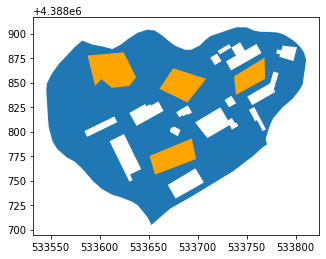

In [13]:
coverage_from_shp.df.plot(ax=area_from_shp.df.plot(), color="orange");

### From a `GeoDataFrame`

The `from_GeoDataFrame()` method is intended to be used much like the `from_shapefile()` method: when you have the spatial properties of the survey units already defined (in this case in a `GeoDataFrame`), even if they are irregular, you can quickly create a `Coverage` object from them.

A `GeoDataFrame` can also be useful when your spatial data is stored in some format other than a shapefile. You can use any package (e.g., `shapely`) to read from the native format to something useable by `geopandas` (e.g., WKT format). `geopandas` can then read this to a `GeoDataFrame` for use in `prospect`.

For the sake of example, let's load the shapefile we used above, convert it to well-known text (WKT) format, then load into a `GeoDataFrame`.

In [14]:
import fiona
from shapely.geometry import shape, Polygon

polys = fiona.open("./data/demo_coverage.shp")
collection_of_polys = [shape(item['geometry']) for item in polys]
units = [Polygon(poly.exterior.coords).wkt for poly in collection_of_polys]

Let's look at an example of the units.

In [15]:
units[0]

'POLYGON ((533601.7657606293 4388853.523606064, 533595.4184860958 4388846.541604077, 533587.8017566557 4388877.643249291, 533624.6159489499 4388880.816886557, 533637.310498017 4388855.427788423, 533630.3284960302 4388846.541604077, 533612.5561273363 4388844.637421716, 533612.5561273363 4388844.637421716, 533612.5561273363 4388844.637421716, 533601.7657606293 4388853.523606064))'

In [16]:
type(units[0])

str

Next, we can put this string representation in a `pandas` `DataFrame`.

In [17]:
import pandas as pd

wkt_df = pd.DataFrame(
    {
        "names": ["unit1", "unit2", "unit3", "unit4"],
        "coordinates":units
    }
)

In [18]:
wkt_df

,names,coordinates
0,unit1,"POLYGON ((533601.7657606293 4388853.523606064,..."
1,unit2,"POLYGON ((533675.0767814913 4388864.631336497,..."
2,unit3,"POLYGON ((533650.957138264 4388775.134765575, ..."
3,unit4,"POLYGON ((533768.3817171339 4388875.421703205,..."


Confirm that the entries in the new column `"coordinates"` are strings.

In [19]:
type(wkt_df['coordinates'][0])

str

In [20]:
from shapely import wkt
import geopandas as gpd
wkt_df["geo_coordinates"] = wkt_df["coordinates"].apply(wkt.loads)
wkt_geodf = gpd.GeoDataFrame(wkt_df, geometry="geo_coordinates")

In [21]:
wkt_geodf

,names,coordinates,geo_coordinates
0,unit1,"POLYGON ((533601.7657606293 4388853.523606064,...","POLYGON ((533601.766 4388853.524, 533595.418 4..."
1,unit2,"POLYGON ((533675.0767814913 4388864.631336497,...","POLYGON ((533675.077 4388864.631, 533708.717 4..."
2,unit3,"POLYGON ((533650.957138264 4388775.134765575, ...","POLYGON ((533650.957 4388775.135, 533694.119 4..."
3,unit4,"POLYGON ((533768.3817171339 4388875.421703205,...","POLYGON ((533768.382 4388875.422, 533769.016 4..."


`"coordinates"` and `"geo_coordinates"` look similar, but the latter now contains `shapely` `Polygon` objects instead of strings and the whole thing is a `GeoDataFrame` suitable for `prospect`.

In [22]:
type(wkt_geodf['geo_coordinates'][0])

shapely.geometry.polygon.Polygon

In [23]:
type(wkt_geodf)

geopandas.geodataframe.GeoDataFrame

Let's complete the cycle by turning this into a `prospect` `Coverage` object.

In [24]:
area_from_shp = prospect.Area.from_shapefile(
    name="area_shp", 
    path="./data/demo_area.shp"
)

coverage_from_gdf = prospect.Coverage.from_GeoDataFrame(
    gdf=wkt_geodf,
    name="demo_coverage_from_gdf",
    area=area_from_shp,
    surveyunit_type="polygon",
    min_time_per_unit=20
)

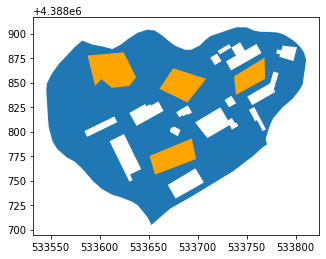

In [25]:
coverage_from_gdf.df.plot(ax=area_from_shp.df.plot(), color="orange");

### Bulk-create transects

Transects are probably the most common type of survey strategy in use in the field. As such, `prospect` includes a `from_transects()` method to easily create a transect-based survey approach.

This method for constructing `Coverage` objects comes with a few special parameters that help `prospect` create the appropriate transects for the given `Area`.

- `spacing`: Distance between transects (the default is 10.0)
- `sweep_width`: Buffer distance around transects (the default is 2.0)
- `orientation`: Angle of the predominant axis of the transects (the default is 0.0)
- `optimize_orient_by` (`'area_coverage'` or `'area_orient'`): Metric to optimize in determining the orientation of transects. `'area_coverage'` chooses the orientation that maximizes the area covered by the transects. `'area_orient'` chooses the orientation that best parallels the `orient_axis` of the area. The default is `None`, in which case the `orientation` parameter is used directly.
- `orient_increment`: Step size (in degrees) to use when testing different orientations. (the default is 5.0)
- `orient_axis` (`'long'` or `'short'`): Axis of the area along which to orient the survey units (the default is `'long'`, which creates rows parallel to the longest axis of the area's minimum rotated rectangle)
- `min_time_per_unit`: Minimum amount of time required to complete one "unit" of survey, given no surveyor speed penalty and no time penalty for recording features. The default is 0.0. *Because transects can differ in length, transect coverages should specify this term as time per one unit of distance (e.g., seconds per meter).*

The `from_transects()` method has a series of possible customizations. We will explore them one-by-one using the same `Area` object we have been using.

In [26]:
area_from_shp = prospect.Area.from_shapefile(
    name="area_shp", 
    path="./data/demo_area.shp"
)

Let's start, however, with a simple version of a transect `Coverage`.

In [27]:
simple_transects = prospect.Coverage.from_transects(
    name="demo_simple_transects", 
    area=area_from_shp, 
    spacing=10, 
    sweep_width=2, 
    min_time_per_unit=20
)

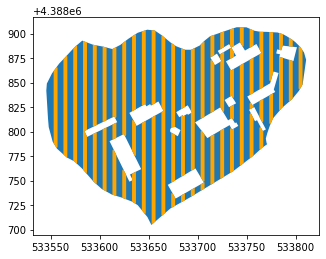

In [28]:
simple_transects.df.plot(ax=area_from_shp.df.plot(), color="orange");

We can vary the spacing and the width of the transects.

In [29]:
simple_transects_spacing = prospect.Coverage.from_transects(
    name="demo_simple_transects_spacing", 
    area=area_from_shp, 
    spacing=20, 
    sweep_width=1, 
    min_time_per_unit=20
)

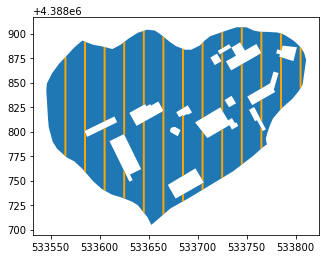

In [30]:
simple_transects_spacing.df.plot(ax=area_from_shp.df.plot(), color="orange");

Notice that by default, the transects are oriented directly north-south. If you know what orientation you would like to use, you can specify that directly with the `orientation` parameter. Here we rotate them 90 degrees to an east-west orientation.

In [75]:
transects_orientation = prospect.Coverage.from_transects(
    name="demo_transects_orientation", 
    area=area_from_shp,
    spacing=20, 
    sweep_width=1, 
    orientation=90,
    min_time_per_unit=20
)

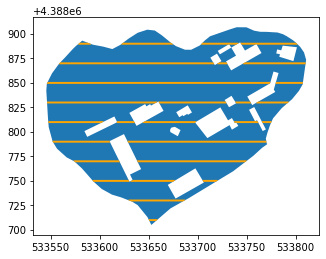

In [76]:
transects_orientation.df.plot(ax=area_from_shp.df.plot(), color="orange");

There are also ways to optimize the orientation of the transects. First, you can choose to find the orientation that maximizes the areal extent of the survey units (`'area_coverage'`).

The `orient_increment` parameter determines the orientations that `prospect` will iterate through. This is useful to specify if you are planning to put a team in the field. It may be impractical to orient a team to fractions of a degree or even a single degree. You might prefer to stick to increments of 5 or 10 degrees. Below, we check every 5 degrees, which is the default.

In [63]:
transects_orientation_areal_cov = prospect.Coverage.from_transects(
    name="demo_transects_orientation_areal_cov", 
    area=area_from_shp,
    spacing=20, 
    sweep_width=1, 
    optimize_orient_by="area_coverage",
    orient_increment=5,
    min_time_per_unit=20
)

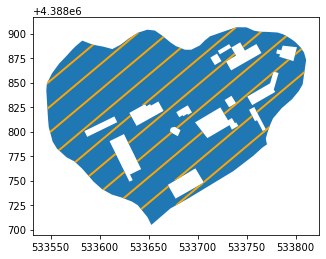

In [64]:
transects_orientation_areal_cov.df.plot(ax=area_from_shp.df.plot(), color="orange");

You can then examine the orientation that was chosen via the `orientation` attribute

In [65]:
transects_orientation_areal_cov.orientation

130

The other optimization option is `'area_orient'`, which chooses the orientation that best parallels the `orient_axis` of the area. You can choose to follow the `'long'` or `'short'` axis.

In [66]:
transects_orientation_areal_orient = prospect.Coverage.from_transects(
    name="demo_transects_orientation_areal_orient", 
    area=area_from_shp,
    spacing=20, 
    sweep_width=1, 
    optimize_orient_by="area_orient",
    orient_axis="long",
    min_time_per_unit=20
)

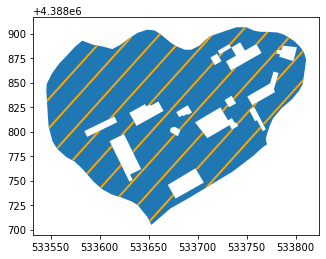

In [67]:
transects_orientation_areal_orient.df.plot(ax=area_from_shp.df.plot(), color="orange");

In [68]:
transects_orientation_areal_orient.orientation

-42.04645468087444

In this example, optimizing by the long axis yields an orientation of -42 degrees (e.g., 318 degrees).

In [70]:
transects_orientation_areal_orient_short = prospect.Coverage.from_transects(
    name="demo_transects_orientation_areal_orient_short", 
    area=area_from_shp,
    spacing=20, 
    sweep_width=1, 
    optimize_orient_by="area_orient",
    orient_axis="short",
    min_time_per_unit=20
)

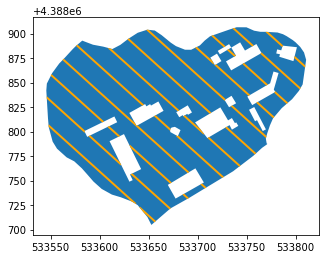

In [71]:
transects_orientation_areal_orient_short.df.plot(ax=area_from_shp.df.plot(), color="orange");

In [72]:
transects_orientation_areal_orient_short.orientation

47.95354531912556

### Bulk-create radial units

The `from_radials()` method creates a regularly-spaced grid of circular survey plots. It has all of the same special parameters as the `from_transects()` method with the exception of the following:

- Instead of `sweep_width`, radials have a `radius` (naturally) that controls how large the survey plots will be.
- The `min_time_per_unit` can be specified as the minimum time it takes to survey one circular plot.

Let's start, however, with a simple version of a radials `Coverage`. The default radius is 1.78, which gives you radials with roughly 10 square units of area.

In [78]:
simple_radials = prospect.Coverage.from_radials(
    name="demo_simple_radials", 
    area=area_from_shp, 
    spacing=10,
    radius=1.78,
    min_time_per_unit=20
)

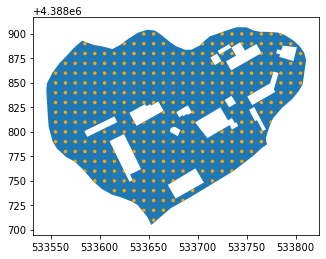

In [79]:
simple_radials.df.plot(ax=area_from_shp.df.plot(), color="orange");

Notice that, like the transects, by default, the transects are oriented directly north-south. If we were to rotate them 90 degrees as we did for the transects, we would get much the same result.

In [82]:
radials_orientation = prospect.Coverage.from_radials(
    name="demo_radials_orientation", 
    area=area_from_shp,
    spacing=10, 
    radius=1.78, 
    orientation=90,
    min_time_per_unit=20
)

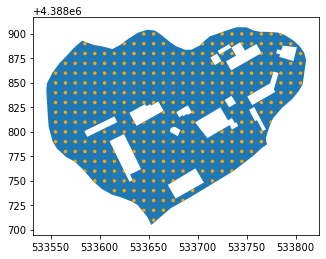

In [83]:
radials_orientation.df.plot(ax=area_from_shp.df.plot(), color="orange");

In [84]:
radials_orientation.orientation

90

The same orientation optimization parameters are available for radial survey units as were available for transects.

First, `area_coverage`:

In [88]:
radials_orientation_areal_cov = prospect.Coverage.from_radials(
    name="demo_radials_orientation_areal_cov", 
    area=area_from_shp,
    spacing=10, 
    radius=1.78, 
    optimize_orient_by="area_coverage",
    orient_increment=5,
    min_time_per_unit=20
)

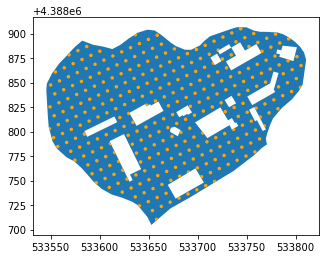

In [86]:
radials_orientation_areal_cov.df.plot(ax=area_from_shp.df.plot(), color="orange");

You can then examine the orientation that was chosen via the `orientation` attribute

In [87]:
radials_orientation_areal_cov.orientation

25

Likewise, `area_orient`:

In [89]:
radials_orientation_areal_orient = prospect.Coverage.from_radials(
    name="demo_radials_orientation_areal_orient", 
    area=area_from_shp,
    spacing=10, 
    radius=1.78, 
    optimize_orient_by="area_orient",
    orient_axis="long",
    min_time_per_unit=20
)

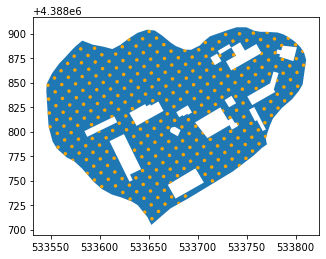

In [90]:
radials_orientation_areal_orient.df.plot(ax=area_from_shp.df.plot(), color="orange");

In [91]:
radials_orientation_areal_orient.orientation

-42.04645468087444

```{admonition} Look!
:class: hint
This is the exact same value as we calculated for the transects!
```

Now for the short axis:

In [92]:
radials_orientation_areal_orient_short = prospect.Coverage.from_radials(
    name="demo_radials_orientation_areal_orient_short", 
    area=area_from_shp,
    spacing=10, 
    radius=1.78, 
    optimize_orient_by="area_orient",
    orient_axis="short",
    min_time_per_unit=20
)

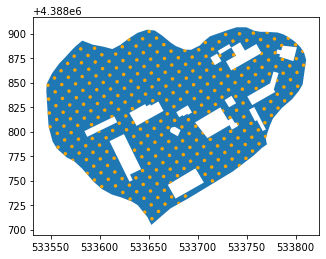

In [93]:
radials_orientation_areal_orient_short.df.plot(ax=area_from_shp.df.plot(), color="orange");

In [94]:
radials_orientation_areal_orient_short.orientation

47.95354531912556

Again, this value matches the one for the transects.

## `min_time_per_unit` parameter

This parameter is used to model the base level of time it takes to survey one unit. For variable-length units like transects, this parameter needs to be an amount of time per unit of distance (e.g., 5 seconds per meter). For fixed-size units like radial units or square units, this can be a single base time.

This parameter should be specified under the following assumptions:
- no surveyor speed penalty (from the Surveyor)
- no time penalty for recording (from the Assemblage)

In other words, it represents only the search time for an expert surveyor who doesn't stop to record any artifacts or features.

With enough prior experience, `min_time_per_unit` can be modeled as a single value constant. If `min_time_per_unit` is being modeled as a distribution, it makes most sense to have it bounded at zero.

```{tip}
The truncated normal distribution is a good choice for this.
```

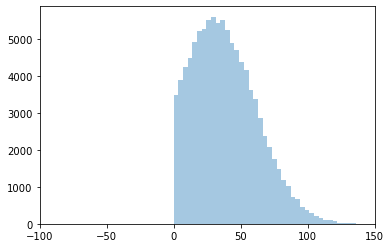

In [97]:
import seaborn as sns
dist_trunc = prospect.utils.truncnorm(mean=30, sd=30, lower=0, upper=200)

hist_trunc = sns.distplot(dist_trunc.rvs(100000), kde=False)  # draw 100k random values and plot
hist_trunc.set_xlim(-100,150);

```{note}
While the truncated normal distribution is a good choice generally, `prospect` allows you to use whatever `scipy` distribution you think fits your case best.
```